In [1]:
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam
E, I = symbols('E, I')

In [2]:
    
def point_load():
    value=float(input("Enter load in KN :\n "))
    pos=float(input("Enter the position in m measured from left: "))
    b.apply_load(value,pos,-1,end=None)
    
def moment():
    value=float(input("Enter moment in KN-m :\n "))
    pos=float(input("Enter the position in m measured from left: "))
    b.apply_load(value,pos,-2,end=None)
def UDL():
    value=float(input("Enter load in KN/m :\n "))
    pos1=float(input("Enter the starting point in m measured from left: "))
    pos2=float(input("Enter the ending point in m measured from left: "))
    b.apply_load(value,pos1,0,end=pos2)
    
def UVL():
    value1=float(input("Enter staring load in KN/m :\n "))
    value2=float(input("Enter ending load in KN/m :\n "))    
    pos1=float(input("Enter the starting point in m measured from left: "))
    pos2=float(input("Enter the ending point in m measured from left: "))
    
    if (value1>0):
        b.apply_load(value1,pos1,0,end=pos2)
        
        
        value2=value2-value1
        value1=0
        slope=value2/(pos2-pos1)
        b.apply_load(slope,pos1,1,end=pos2)
        
        #b.apply_load(1, pos1, 1, end=6)
    else:
        slope=value2/(pos2-pos1)
        b.apply_load(slope,pos1,1,end=pos2)
        
        
        
def fixed(loc):
    b.apply_support(loc,type='fixed')
    
def pin(loc):
    b.apply_support(loc,type='pin')

def roller(loc):
    b.apply_support(loc,type='roller')
    
    
    
    
        
        
        
        
reac_counter=0    
    
    
    
    
    
    

In [3]:
l=value=float(input("Enter the length of the beam in m:\n"))
b = Beam(l, E, I)

npl=int(input("Enter the number of point loads:\n"))
for i in range(npl):
    point_load()
    
    
nm=int(input("Enter the number of moment:\n"))
for i in range(nm):
    moment()
    
    
udl=int(input("Enter the number of UDLs:\n"))
for i in range(udl):
    UDL()
    
uvl=int(input("Enter the number of UVLs:\n"))
for i in range(uvl):
    UVL()
    
fs=int(input("Enter the number of fixed supports:\n"))
reac_counter=reac_counter+(2*fs)
for i in range(fs):
    loc=float(input("Enter the location in m:\n"))
    fixed(loc)
    
    
ps=int(input("Enter the number of pin supports:\n"))
reac_counter=reac_counter+ps
for i in range(ps):
    loc=float(input("Enter the location in m:\n"))
    pin(loc)
    
rs=int(input("Enter the number of roller supports:\n"))
reac_counter=reac_counter+rs
for i in range(rs):
    loc=float(input("Enter the location in m:\n"))
    roller(loc)
    

    

Enter the length of the beam in m:
9
Enter the number of point loads:
1
Enter load in KN :
 -12
Enter the position in m measured from left: 8
Enter the number of moment:
1
Enter moment in KN-m :
 -50
Enter the position in m measured from left: 5
Enter the number of UDLs:
1
Enter load in KN/m :
 -8
Enter the starting point in m measured from left: 0
Enter the ending point in m measured from left: 4
Enter the number of UVLs:
1
Enter staring load in KN/m :
 4
Enter ending load in KN/m :
 8
Enter the starting point in m measured from left: 2
Enter the ending point in m measured from left: 6
Enter the number of fixed supports:
0
Enter the number of pin supports:
1
Enter the location in m:
0
Enter the number of roller supports:
1
Enter the location in m:
6.5


In [137]:
b.load

18.6666666666667*SingularityFunction(x, 0.0, -1) - 8.0*SingularityFunction(x, 0.0, 0) + 4.0*SingularityFunction(x, 2.0, 0) + 1.0*SingularityFunction(x, 2.0, 1) + 8.0*SingularityFunction(x, 4.0, 0) - 50.0*SingularityFunction(x, 5.0, -2) - 8.0*SingularityFunction(x, 6.0, 0) - 1.0*SingularityFunction(x, 6.0, 1) + 1.33333333333334*SingularityFunction(x, 6.5, -1) - 12.0*SingularityFunction(x, 8.0, -1)

In [138]:
b.applied_loads

[(-12.0000000000000, 8.00000000000000, -1, None),
 (-50.0000000000000, 5.00000000000000, -2, None),
 (-8.00000000000000, 0.0, 0, 4.0),
 (4.00000000000000, 2.00000000000000, 0, 6.0),
 (1.00000000000000, 2.00000000000000, 1, 6.0),
 (R_0.0, 0.0, -1, None),
 (R_6.50000000000000, 6.50000000000000, -1, None)]

In [139]:
n=reac_counter
listreac = b.applied_loads[-n:]
reac = []

for a_tuple in listreac:
    reac.append(a_tuple[0])

In [140]:
reac

[R_0.0, R_6.50000000000000]

In [135]:
re=[]    
for x in range(n):
    re.append("R" + str(x))  
      

In [136]:
re1=re
print(re)

['R0', 'R1']


In [ ]:
tan=[]

In [143]:
for i in range(len(reac)):
    globals()['R_%s' % x] =str(reac[i])
    

AttributeError: type object 'tan' has no attribute 'append'

In [148]:
R_0

R_0.0

In [105]:
R_4 = symbols(r2)

R_0=symbols(r1)

In [130]:
b.solve_for_reaction_loads(re1)
b.reaction_loads

TypeError: unhashable type: 'list'

In [107]:
b.load
b.shear_force()
b.bending_moment()

18.6666666666667*SingularityFunction(x, 0.0, 1) - 4.0*SingularityFunction(x, 0.0, 2) + 2.0*SingularityFunction(x, 2.0, 2) + 0.166666666666667*SingularityFunction(x, 2.0, 3) + 4.0*SingularityFunction(x, 4.0, 2) - 50.0*SingularityFunction(x, 5.0, 0) - 4.0*SingularityFunction(x, 6.0, 2) - 0.166666666666667*SingularityFunction(x, 6.0, 3) + 1.33333333333334*SingularityFunction(x, 6.5, 1) - 12.0*SingularityFunction(x, 8.0, 1)

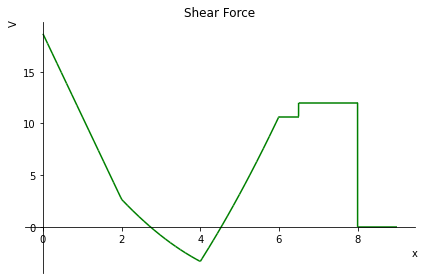

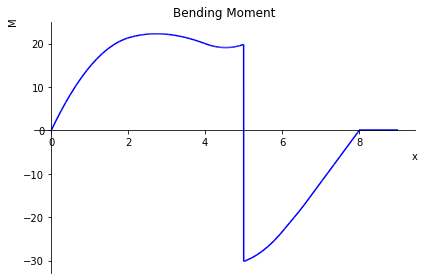

In [108]:
b.plot_shear_force()  
b.plot_bending_moment() 

In [99]:
'''for x in range(n):
    globals()['R_%s' % x] =str(reac[x])'''
    
re=[]    
for x in range(n):
    re.append("R" + str(x))  
      
    
    
    

In [87]:

print(re)

['R0', 'R1']


In [88]:
re1=re

In [89]:
len(re)

2

In [90]:
len(reac)

2

In [91]:
re=reac

In [92]:
re[1]

R_6.50000000000000

In [93]:
len(re)

2

In [ ]:
re=str(reac)

In [49]:
re=str(reac)
    

In [52]:
rs=symbols(re[1:-1])

In [53]:
rs[0]

R_0.0

In [23]:
'''for i in range(len(re)):
    re[i]=symbol(re(i))'''

TypeError: 'list' object is not callable

In [ ]:
#R_0=str(reac[0])
#R_6=str(reac[1])

In [ ]:
#R0 = symbols(R_0)

#R2=symbols(R_1)

In [94]:

b.solve_for_reaction_loads(re)
b.reaction_loads

TypeError: unhashable type: 'list'

In [ ]:
b.load

In [ ]:
b.shear_force()

In [ ]:
b.bending_moment()

In [ ]:
b.plot_shear_force()  
b.plot_bending_moment() 